<a href="https://colab.research.google.com/github/KaranTejwani/deep-learning-practise/blob/main/cnn_based_classification_of_intel_images_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating and comparing simple CNN and CNN with augmentation to assess their performance

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

**Simple CNN model**

In [2]:
inputs = keras.Input(shape=(150,150,3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │        76,806 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,645,382 (6.28 MB)

 Trainable params: 1,645,382 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
base_dir = '/content/drive/My Drive/datasets/intel_image_classification_small'

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'training',
    seed = 123,
    label_mode = 'categorical'
)

val_dataset = image_dataset_from_directory(
    base_dir+'/train',
    image_size=(150, 150),
    batch_size=32,
    validation_split = 0.306,
    subset = 'validation',
    seed = 123,
    label_mode = 'categorical'
)

test_dataset = image_dataset_from_directory(
    base_dir+'/test',
    image_size=(150, 150),
    batch_size=32,
    label_mode = 'categorical'
)

Found 864 files belonging to 6 classes.
Using 600 files for training.
Found 864 files belonging to 6 classes.
Using 264 files for validation.
Found 600 files belonging to 6 classes.


In [8]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=32
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 136s 7s/step - accuracy: 0.2481 - loss: 1.7809 - val_accuracy: 0.4356 - val_loss: 1.4142
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4239 - loss: 1.4379 - val_accuracy: 0.4811 - val_loss: 1.2433
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4663 - loss: 1.2827 - val_accuracy: 0.5189 - val_loss: 1.1575
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5091 - loss: 1.1835 - val_accuracy: 0.4773 - val_loss: 1.2529
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5186 - loss: 1.1515 - val_accuracy: 0.5758 - val_loss: 1.0570
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5199 - loss: 1.1813 - val_accuracy: 0.5833 - val_loss: 1.0708
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5752 - loss: 1.0333 - val_accuracy: 0.5985 - val_loss: 1.0180
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6239 - loss: 0.9624 - val_accuracy: 0.6098 - val_loss

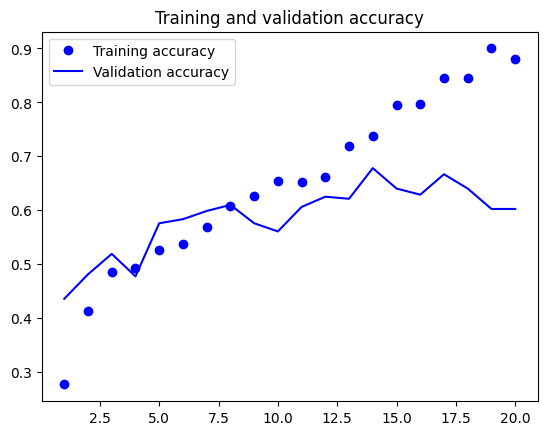

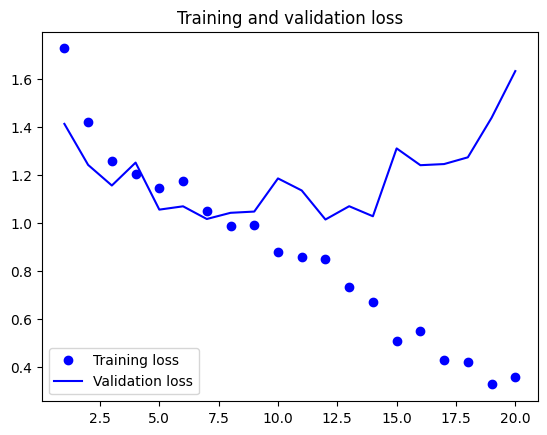

In [9]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 102s 5s/step - accuracy: 0.5848 - loss: 1.6168
Test accuracy: 0.588


**CNN model with augmented Layer**

In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("vertical"),
        layers.RandomRotation(0.3),
        layers.RandomZoom(0.3),
    ]
)

In [15]:
inputs = keras.Input(shape=(150,150,3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=512, kernel_size=3, activation='relu')(x)
# x = layers.MaxPooling2D(pool_size=2)(x)

# x = layers.Conv2D(filters=1024, kernel_size=3, activation='relu')(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [17]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=32
)

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.2146 - loss: 1.7737 - val_accuracy: 0.2879 - val_loss: 1.4687
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3669 - loss: 1.5238 - val_accuracy: 0.3106 - val_loss: 1.5058
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3469 - loss: 1.4977 - val_accuracy: 0.4356 - val_loss: 1.3674
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4106 - loss: 1.3666 - val_accuracy: 0.4129 - val_loss: 1.4275
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3940 - loss: 1.3820 - val_accuracy: 0.3030 - val_loss: 1.6689
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.3845 - loss: 1.4100 - val_accuracy: 0.3598 - val_loss: 1.6311
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.4255 - loss: 1.3487 - val_accuracy: 0.4773 - val_loss: 1.3392
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.4372 - loss: 1.3344 - val_accuracy: 0.4091 - val_loss:

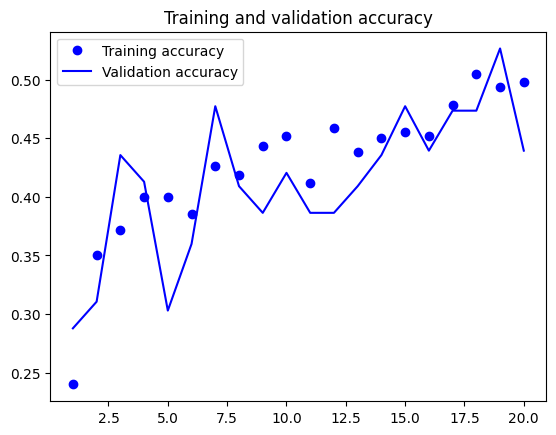

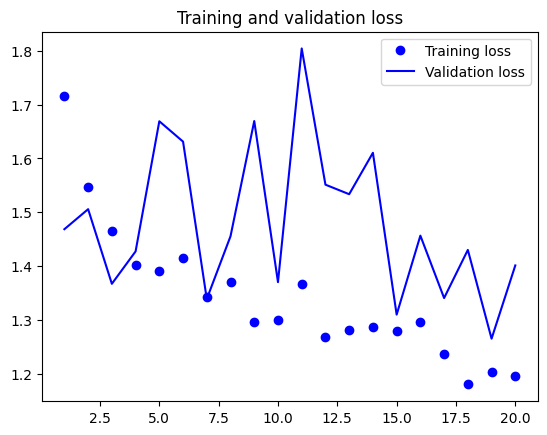

In [18]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 489ms/step - accuracy: 0.4036 - loss: 1.6804
Test accuracy: 0.395


**Discussion on both the models**

If we look at the accuracies of both the models we would find that simple CNN without sugmentation is working better compare to augmented. This is because the augmentation is distorting the original images too much which introduces noise like vertical flip changes the complete context of image, building does not look like a building after vertical flip. If there was a circular or symmetric shape vertical flip could have been applicable but not in this case. Also we have very small data which is impacted two much by the distortion in the images created using aggressive augmented layer which is affecting the accuracy of the model too much making it difficult for the CNN model to learn meaningful patterns

In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

class_labels = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

def predict_image(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array = img_array / 255.0

  predictions = model.predict(img_array)
  predicted_index = np.argmax(predictions[0])
  predicted_class = class_labels[predicted_index]

  print(f"Predicted class: {predicted_class}")
  return predicted_class


In [22]:
print(predict_image('/content/drive/My Drive/sea.jpg'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Predicted class: sea
sea
